Lecture : https://www.youtube.com/watch?v=FoRsn1VwEbA&list=PLtqF5YXg7GLlQJUv9XJ3RWdd5VYGwBHrP&index=5

Compare models

Import libraries

In [ ]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

Load dataset

In [ ]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2022-08-06 08:44:19--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2022-08-06 08:44:20--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_

In [ ]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [ ]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

3. Data pre-processing

In [ ]:
X.shape

(4695, 881)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Compare ML algorithms

In [ ]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:00<00:00, 235824.32it/s]


In [ ]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.86,0.86,0.57,5.96
DecisionTreeRegressor,0.86,0.86,0.57,0.15
ExtraTreeRegressor,0.86,0.86,0.57,0.15
GaussianProcessRegressor,0.86,0.86,0.57,5.48
RandomForestRegressor,0.82,0.83,0.64,4.59
XGBRegressor,0.82,0.83,0.65,1.96
BaggingRegressor,0.80,0.81,0.67,0.57
MLPRegressor,0.76,0.77,0.75,6.87
HistGradientBoostingRegressor,0.67,0.69,0.87,2.77


In [ ]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:53<00:00,  1.28s/it]


In [ ]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.46,0.54,1.06,2.16
LGBMRegressor,0.46,0.54,1.06,0.41
RandomForestRegressor,0.44,0.52,1.08,4.52
XGBRegressor,0.43,0.51,1.09,1.93
BaggingRegressor,0.41,0.50,1.10,0.77
NuSVR,0.39,0.48,1.12,3.49
SVR,0.39,0.48,1.12,4.30
KNeighborsRegressor,0.37,0.46,1.14,0.99
MLPRegressor,0.36,0.45,1.15,6.93


In [ ]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.46,0.54,1.06,2.16
LGBMRegressor,0.46,0.54,1.06,0.41
RandomForestRegressor,0.44,0.52,1.08,4.52
XGBRegressor,0.43,0.51,1.09,1.93
BaggingRegressor,0.41,0.50,1.10,0.77
NuSVR,0.39,0.48,1.12,3.49
SVR,0.39,0.48,1.12,4.30
KNeighborsRegressor,0.37,0.46,1.14,0.99
MLPRegressor,0.36,0.45,1.15,6.93


5. Data visualization of model performance

R-squared values

[(0.0, 1.0)]

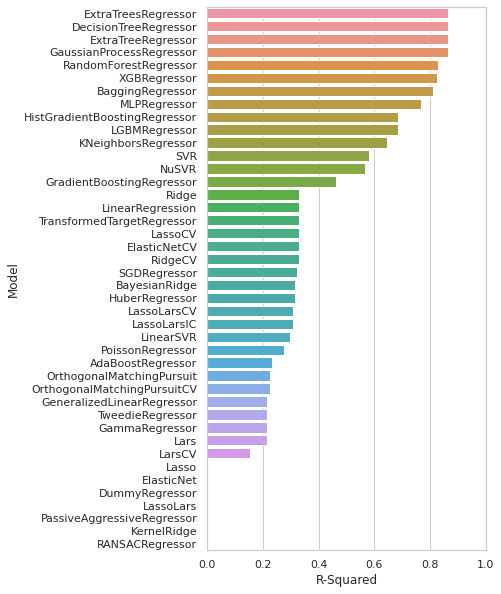

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

RMSE values

[(0.0, 10.0)]

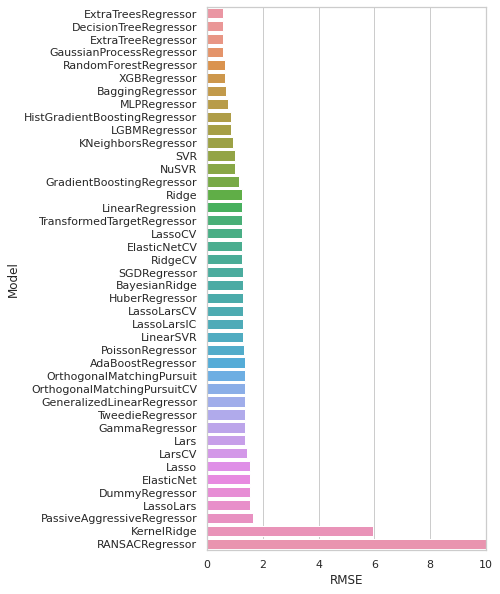

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

Calculation time

[(0.0, 10.0)]

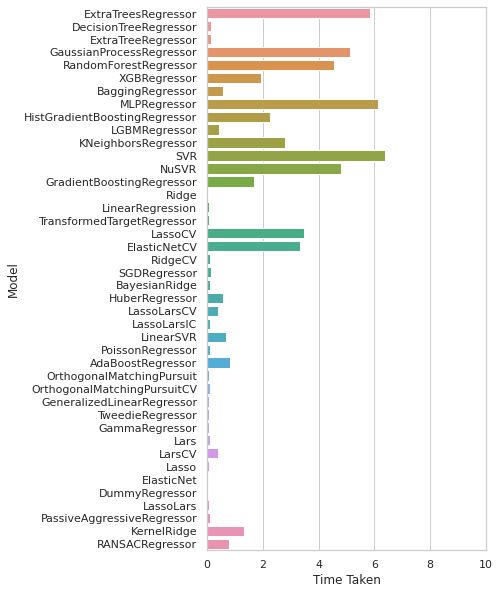

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))